## Setup

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [2]:
!pip install wandb
import wandb as wb

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.8 MB/s eta 0:00:00m eta 0:00:010:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 24.9 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=33406cb21cc6f6a680b2428672ef3057557b4059b1e747325ae5b1d93b6e64d2
  Stored in directory: /home/deepzoo/.cache/pip/wheels/54/4e/28/3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8785 sha256=32b3229bbe7767fac2eb54773a920d255ef3f40b97c73c89eaae43f19b3c0a7e
  Stored in directory: /home/deepzoo/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built promise pathtools


In [6]:
# import os
# import sys
# import time
# import copy
# import json
# import pylab
# 
# import random
# import imageio
# import requests
# import subprocess
# import torchvision

# import pandas as pd
# import seaborn as sns
# 
# from torchvision.models import *
# import torch.nn as nn
# 
# from scipy import stats
# from torch import matmul
# import torchvision.utils
# from scipy import signal
# from bisect import bisect
# import torch.optim as optim
# from skimage import io as io
# from numpy import linalg as LA
# from google.colab import drive
# from torchvision import models
# from skimage import io as skio
# import torch.nn.functional as F
# 
# from torchvision.models import *
# from torchsummary import summary
# 
# from torch.nn.functional import *
# from random import random, randint
# from torchvision import transforms
# from torch.autograd import Variable
# from torch.optim import lr_scheduler
# 
# from sklearn.decomposition import PCA
# from torchvision.datasets import MNIST
# from mpl_toolkits.mplot3d import Axes3D
# from torch.utils.data import DataLoader
# from torchvision.utils import save_image
# from sklearn.metrics import roc_auc_score
# from torchvision import models, transforms
# from urllib.request import Request, urlopen
# import torchvision.transforms as transforms
# from torchvision import datasets, transforms
# from sklearn.metrics import confusion_matrix
# from torch.utils.data import Dataset, DataLoader
# from torchvision import datasets, models, transforms
# from sklearn.linear_model import LogisticRegression as LR
# 
# from torch.utils.data import DataLoader, TensorDataset, random_split
# from torchvision.transforms.functional import normalize







def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
    
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2



def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s



def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  



def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)


def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]




def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


def CPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cpu'))

def CPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cpu'))





def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()
    
    
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))    


def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y



def vizvec(x): 

    fig, ax = plt.subplots()

    min_val, max_val = 0, 15

    ax.matshow(x, cmap=plt.cm.Blues)
    
    plt.axis('off')

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            c = x[i,j]
            ax.text(j, i, str(c), va='center', ha='center')


def gradient_step(w):

    for j in range(len(w)): 

            w[j].data = w[j].data - c.h*w[j].grad.data
            
            w[j].grad.data.zero_()


def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})
    
    

In [24]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

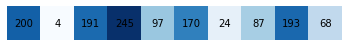

In [25]:
x = np.random.randint(0, 255, size=(1, 10))
vizvec(x)

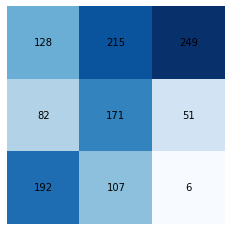

In [26]:
x = np.random.randint(0, 255, size=(3, 3))
vizvec(x)

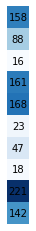

In [27]:
x = np.random.randint(0, 255, size=(10, 1))
vizvec(x)

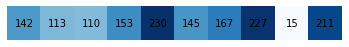

In [28]:
x = np.random.randint(0, 255, size=(1, 10))
vizvec(x)


## MNIST
    

### Load Data

In [29]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [30]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [31]:
X.shape

(60000, 1, 28, 28)

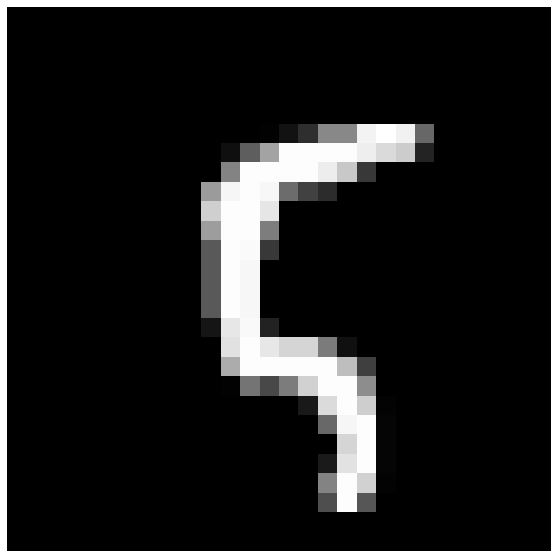

In [32]:
plot(X[100,0,:,:])

In [33]:
Y[100]

5

In [34]:
X[0:25,0,:,:].shape

(25, 28, 28)

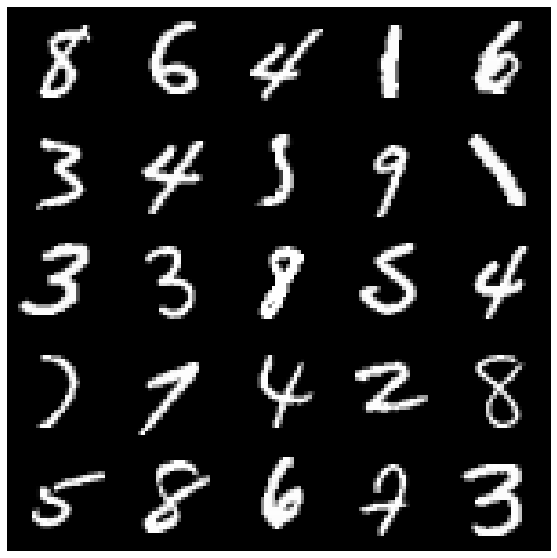

In [35]:
montage_plot(X[125:150,0,:,:])

In [36]:
X.shape[0]

60000

In [37]:
X_test.shape

(10000, 1, 28, 28)

In [38]:
X.shape[0]

60000

In [39]:
X_test.shape[0]

10000

In [42]:
# X = GPU_data(X)
# Y = GPU_data(Y)
# X_test = GPU_data(X_test)
# Y_test = GPU_data(Y_test)

In [43]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)


### Classifier


In [44]:
x,y = get_batch('train')

In [45]:
x.shape

(1000, 784)

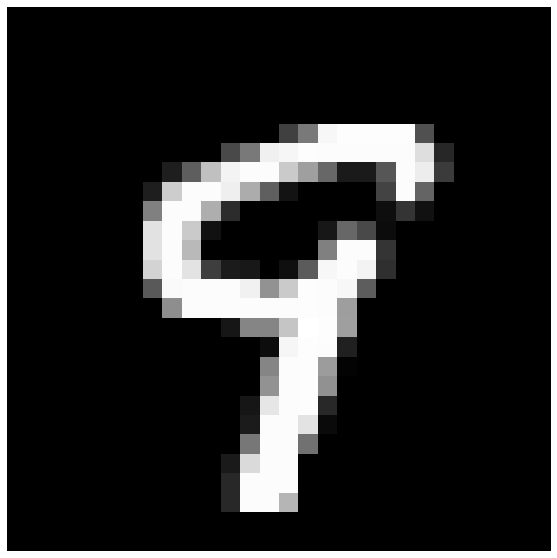

In [46]:
plot(x[0].reshape(28,28))

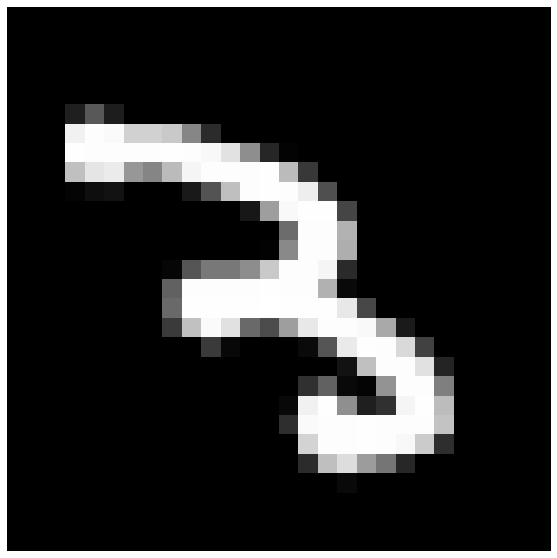

In [47]:
plot(x[1].reshape(28,28))

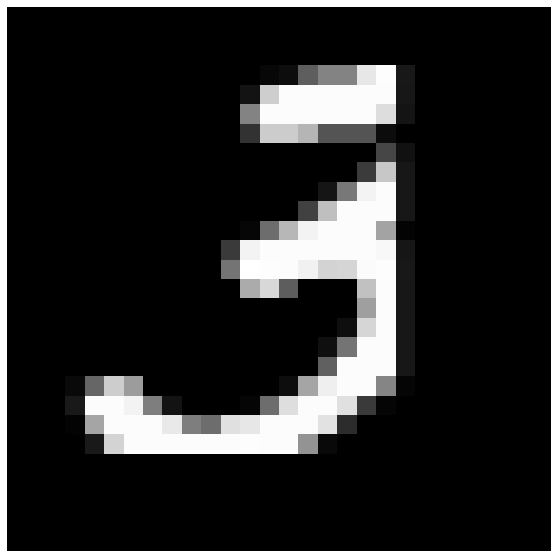

In [48]:
plot(x[2].reshape(28,28))

In [49]:
y[:10]

array([9, 3, 3, 1, 7, 7, 1, 4, 0, 7])

In [3]:
W = CPU(np.random.randn(784,10))

NameError: name 'CPU' is not defined

In [ ]:
x.shape, W.shape

In [ ]:
torch.matmul(x,W).shape

In [ ]:
(x@W).shape

In [ ]:
%%timeit
x@W

In [ ]:
x@W

In [ ]:
y2 = x@W 

In [ ]:
plot(y2)

In [ ]:
y

In [ ]:
y.shape

In [ ]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
one_hot(y)

In [ ]:
torch.argmax(y2,1)

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

In [ ]:
X.shape

In [ ]:
X@W

In [ ]:
torch.argmax(X@W,1)

In [ ]:
Y

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

In [ ]:
X@W

In [ ]:
W.shape

In [ ]:
W[:,0].shape

In [ ]:
plot(W[:,0].reshape(28,28))

In [ ]:
plot(W[:,2].reshape(28,28))

In [ ]:
W.shape

In [ ]:
(W.T).shape

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data
    
    w[0].grad.data.zero_()

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_SGD_Book_2");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(randn_trunc((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()
    
        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(randn_trunc((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)  

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')
    
    x_fake = Autoencoder(x_real,w)
    
    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if i % 100 == 0: print(loss.item())

In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



Convolutional Transpose

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 32

In [ ]:
#MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500 
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = Variable(torch.randn(steps,batch_size,latent_size).cuda())
z2 = Variable(torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):
        
    images,y = get_batch('train')
        
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()
       
    
    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    
    if i % 2000 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

# 2nd Edition

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png',"image1.png")
  
im = Image.open("image1.png")

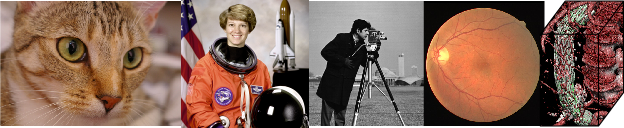

In [ ]:
im

In [ ]:
im = imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')

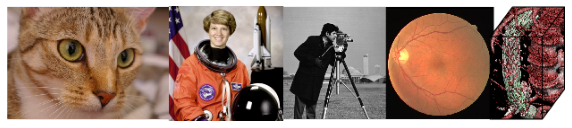

In [ ]:
plot(im)

### Resize Image

In [ ]:
im.shape

(128, 624, 4)

In [ ]:
height = 128
width = 128

im_new = resize(im,(height,width))

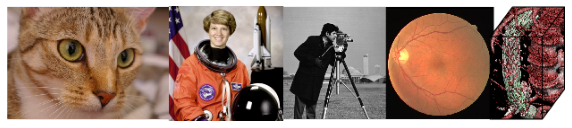

In [ ]:
plot(im)

### Show RGB Channels

In [ ]:
im = imread('https://ecdn.teacherspayteachers.com/thumbitem/Free-Printable-Color-Chart-for-Preschool-5478140-1597652965/original-5478140-2.jpg')

In [ ]:
im.shape

(350, 247, 3)

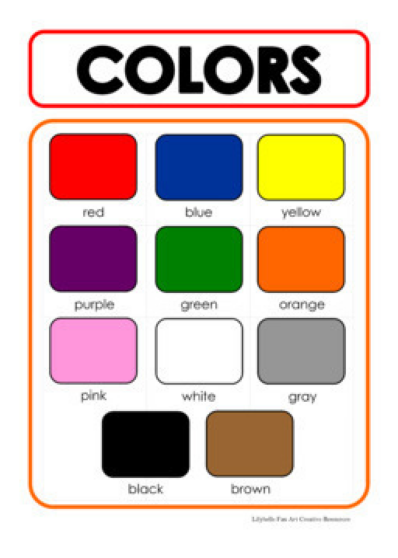

In [ ]:
plot(im)

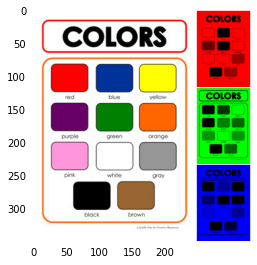

In [ ]:
fig = plt.figure()
ax = RGBAxes(fig, [0.1, 0.1, 0.8, 0.8])
ax.imshow_rgb(im[:,:,0],im[:,:,1],im[:,:,2]);

## Alexnet

In [ ]:
def scale(x):
    return (x - np.min(x))/np.max(x)
def scale1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x,cmap='gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
image = skio.imread("http://ian-albert.com/games/super_mario_bros_maps/mario-2-2.gif")
image = image[:,0:700,:]
plot(image)

In [ ]:
coin = image[185:200,224:239,:]

In [ ]:
plot(coin)

In [ ]:
image = image[60:,0:700,:]
plot(image)

In [ ]:
image=np.mean(image,axis=2)
coin=np.mean(coin,axis=2)
image=scale1(image)
coin=scale1(coin)

In [ ]:
plot(image)


In [ ]:
plot(coin)

In [ ]:
coin.shape

In [ ]:
image = image - np.mean(image)
coin = coin - np.mean(coin)

In [ ]:
z=signal.convolve2d(image, np.rot90(coin, 2))

In [ ]:
plot(z)

In [ ]:
plot(z==np.max(z))

In [ ]:
[y,x] = np.where(z == np.amax(z))

In [ ]:
plt.plot(x,-y,'r.',markersize=30)
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(image, cmap = 'gray')
ax.axis('off')
fig.set_size_inches(20, 10)
ax.scatter(x-6, y-6, c='#f97306', s=80) #https://xkcd.com/color/rgb/
plt.show()

In [ ]:
net = alexnet(pretrained=True).cuda(0)

In [ ]:
normalize = transforms.Normalize(
   mean=[0.485, 0.456, 0.406],
   std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   normalize
])

In [ ]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')

In [ ]:
plot(im)

In [ ]:
image = Image.fromarray(im) #convert to pil

In [ ]:
img_tensor = preprocess(image)

In [ ]:
img_tensor = img_tensor.unsqueeze_(0)

In [ ]:
img_tensor.shape

In [ ]:
img_variable = torch.tensor(img_tensor).cuda(0)

In [ ]:
img_variable.shape

In [ ]:
%%timeit
out = net(img_variable)

In [ ]:
out = net(img_variable)

In [ ]:
out.shape

In [ ]:
out

In [ ]:
label_index = out.cpu().data.numpy().argmax()

In [ ]:
label_index

In [ ]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])

In [ ]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'

In [ ]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [ ]:
print(labels[label_index])

In [ ]:
for i in range(10):
    print(labels[top_list[i]])

In [ ]:
net

In [ ]:
summary(net, (3, 224, 224))

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()

In [ ]:
plot(out[0,0,:,:])

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

In [ ]:
plot(im)

In [ ]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor).cuda(0)
    return img_variable

In [ ]:
out = net(load_im(im))

In [ ]:
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    print('____')
    for i in range(10):
        print(labels[top_list[i]])

In [ ]:
inference(im)

In [ ]:
net

In [ ]:
w1 = net.features[0].weight.data.cpu().numpy()

In [ ]:
w1.shape

In [ ]:
w1 = np.transpose(w1,(0,2,3,1))

In [ ]:
w1.shape

In [ ]:
Wp = (w1 - np.mean(w1))/np.std(w1)

In [ ]:
M = montage(Wp, multichannel=True)

In [ ]:
M.shape

In [ ]:
plot(Wp[0,:,:,:])

In [ ]:
plot(np.random.random((11,11,3)))

In [ ]:
plot(montage(Wp, multichannel=True))

In [ ]:
plot(montage(w1, multichannel=True))

In [ ]:
plot(scale1(montage(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1)), multichannel=True)))

In [ ]:
plot(scale(montage(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1)), multichannel=True)))

In [ ]:
img_variable.flatten().shape

In [ ]:
out = net.features[0](img_variable).cpu().detach().numpy()

In [ ]:
out.shape

In [ ]:
plot(out[0,0,:,:])

In [ ]:
img_variable.shape

In [ ]:
3*224*224

In [ ]:
64*55*55

In [ ]:
out = np.squeeze(out)

In [ ]:
plot(montage(out))

In [ ]:
plot(scale(montage(np.transpose(net.features[0].weight.data.cpu().numpy(),(0,2,3,1)), multichannel=True)))

In [ ]:
for i in range(12):
    plot(montage(np.squeeze(net.features[0:i](img_variable).cpu().detach().numpy()))) 

In [ ]:
plot(montage(np.squeeze(net.avgpool(net.features[0:13](img_variable)).cpu().detach().numpy())))  

In [ ]:
net.features[0:13](img_variable).cpu().detach().numpy().shape

In [ ]:
net

In [ ]:
net.avgpool(net.features[0:13](img_variable)).shape

In [ ]:
net.avgpool(net.features[0:13](img_variable)).flatten().shape[0]

In [ ]:
plt.plot(np.arange(9216),net.avgpool(net.features[0:13](img_variable)).flatten().cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
9216 / (3*224*224) # percentage of numbers left, vs original pixels

In [ ]:
net.classifier[0](net.avgpool(net.features[0:13](img_variable)).flatten()).shape

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:2](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:3](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:5](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
plt.plot(np.arange(1000),net.classifier[0:7](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
out = net.classifier[0:7](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy()

In [ ]:
def softmax(x):

    s = np.exp(x)

    s = s / np.sum(s)

    return s

In [ ]:
out = softmax(out)

In [ ]:
plt.plot(np.arange(1000),out)
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [ ]:
label_index = out.argmax()

In [ ]:
label_index

In [ ]:
top_list = np.flip(np.argsort(out))[0:10]

In [ ]:
top_list

In [ ]:
for i in range(10):
    print(labels[top_list[i]])

## Alexnet Custom

Two possible ways to create your dataset: (1) Make one with your own with your camera/phone or (2) Build one with Image Search (Google/Bing)

The idea is to have (at least) two categories for which you will train an inference model. You will then present data from your reserved validation set to evaluate your models ability to distinguish the two categories. For example, pick any living object like ants and then collect photos with and without ants in the pictures. You will then put these pictures on your google drive and run a classification model just like with flowers 102.

The more photos you collect the better your model will be. You must have at least 50 photographs for each of your two categories. (This should not take a long time.)

Note you must put around 20% of your images into the valid folder.

Example data folders here: https://drive.google.com/drive/folders/1Je_gRF8RnhszAAbQhw2IzqM2_7byPVtL?usp=sharing

Example Ideas:

Ex1 Camera: Ant finder Close up of ground/floor with ants in photo vs Close up photo with no ants

Ex2 Camera: Palm tree with coconuts vs Palm tree with dates (Both are all over FAU)

Ex3 Web Search: Marine animal (bird) vs Marine animal covered in oil from oil spill

Ex4 Web Search: Burrowing owl adult vs Burrowing owl chick

In [ ]:
!pip install flashtorch
!pip install barbar

In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
from flashtorch.utils import apply_transforms
from flashtorch.saliency import Backprop
import itertools
from sklearn.metrics import confusion_matrix
from torchsummary import summary

In [ ]:
drive.mount('/content/drive')

In [ ]:
# Create new folder on your google drive like below:

In [ ]:
data_dir = '/content/drive/My Drive/Data1/antsbeesdataset/'

In [ ]:
os.chdir(data_dir)

In [ ]:
pwd

In [ ]:
ls

In [ ]:
ls train

In [ ]:
ls valid

In [ ]:
dataset_labels =["ants", "bees"] #<--- Replace with your labels 

In [ ]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  #Data Augmentation 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [ ]:
batch_size = 16
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset_sizes

In [ ]:
def imshow(inp, title = " "):
    fig, ax = plt.subplots()
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp)
    plt.title(title, loc='center')
    # fig.set_size_inches(5, 5)
    plt.show()

In [ ]:
inputs, classes = next(iter(dataloaders['train']))
inputs = inputs[:4]
classes = classes[:4] 
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[dataset_labels[x] for x in classes])

In [ ]:
def train_model(model, num_epochs=25):

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    for epoch in range(num_epochs):

        print('Epoch: ',epoch+1,'/',num_epochs)

        ###Train
        model.train() 
        running_corrects = 0
        for inputs, labels in dataloaders['train']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)

            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print("Train ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['train']))
        
        scheduler.step()
    
        ###Val
        model.eval()  
        running_corrects = 0
        for inputs, labels in dataloaders['valid']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

        print("Valid ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['valid']))
        print("#######################")
    return model

In [ ]:
model = models.alexnet(pretrained=True)

In [ ]:
batch_size = 16
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model

In [ ]:
model.classifier[6] = nn.Linear(4096, 102)

In [ ]:
model

In [ ]:
model = train_model(model, num_epochs=3)

In [ ]:
model = train_model(model, num_epochs=30)

In [ ]:
def visualize_model(model, num_images=16):
    model.eval()
    index = 0
    for i, (inputs, labels) in enumerate(dataloaders['valid']):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        preds = torch.max(outputs, 1)[1]

        for j in range(inputs.size()[0]):
            index += 1
            title1 = 'predicted: ' + dataset_labels[preds[j]] + '     class: ' + dataset_labels[labels[j]]
            imshow(inputs.cpu().data[j],title1)

            if index == num_images:
                return

In [ ]:
visualize_model(model)

In [ ]:
summary(model, (3, 224, 224))

In [ ]:
image = io.imread('https://cdn.branchcms.com/7XlaZw139w-1201/images/ant-pest-image.v1.jpg')
plt.imshow(image);

In [ ]:
img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)

In [ ]:
outputs = model(img)
preds = torch.max(outputs, 1)[1]

In [ ]:
print('predicted: ' + dataset_labels[preds])

In [ ]:
batch_size = 1024 #large batch size so we test all the data
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
inputs,labels = next(iter(dataloaders['valid']))
inputs = inputs.to(device)
labels = labels.detach().cpu().numpy()

In [ ]:
outputs = model(inputs)
preds = torch.max(outputs, 1)[1].detach().cpu().numpy()

In [ ]:
cm = confusion_matrix(preds.reshape(-1),labels)

In [ ]:
print("Confusion Matrix : ")
cm

## Load Data Deck

Google Slides URL: be sure to share slides with "Anyone with Link"

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
%%capture
!apt-get install poppler-utils
!pip install pdf2image

In [ ]:
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') 
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_slides(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    url = url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

In [ ]:
images = get_slides(url)

for i, image in enumerate(images):
    plot(image)
    print(np.array(image).shape)
    # image.save('out_'+str(i)+'.jpg', 'JPEG')

    img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)
    outputs = net(img)
    preds = torch.max(outputs, 1)[1]
    preds = preds.item()
    LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json'
    labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}
    print(labels[preds])